<a href="https://colab.research.google.com/github/plaban1981/Deep-Learning-KERAS/blob/master/Computer_Vision_Cook_Book_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import the required libraries from the Keras API

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras import Input
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential

## Create a model using the Sequential API by passing a list of layers to the Sequential constructor.

In [ ]:
layers = [Dense(256, input_shape=(28 * 28 * 1,),activation='sigmoid'),
Dense(128, activation='sigmoid'),
Dense(10, activation='softmax')]
sequential_model_list = Sequential(layers)

## Create a model using the add() method to add one layer at a time

In [ ]:
sequential_model = Sequential()
sequential_model.add(Dense(256,input_shape=(28 * 28 * 1,),activation='relu'))
sequential_model.add(Dense(128, activation='relu'))
sequential_model.add(Dense(10, activation='softmax'))

## Create a model using the Functional API. The numbers in each layer correspond to the number of neurons or units it contains:

In [ ]:
input_layer = Input(shape=(28 * 28 * 1,))
dense_1 = Dense(256, activation='sigmoid')(input_layer)
dense_2 = Dense(128, activation='sigmoid')(dense_1)
predictions = Dense(10, activation='softmax')(dense_2)
functional_model = Model(inputs=input_layer,outputs=predictions)

## Create a model using an object-oriented approach by sub-classing tensorflow.keras.models.Model

In [ ]:
class ClassModel(Model):
  def __init__(self):
    super(ClassModel, self).__init__()
    self.dense_1 = Dense(256, activation='sigmoid')
    self.dense_2 = Dense(256, activation='sigmoid')
    self.predictions = Dense(10,activation='softmax')

  def call(self, inputs, **kwargs):
    x = self.dense_1(inputs)
    x = self.dense_2(x)
    return self.predictions(x)

class_model = ClassModel()

## Prepare the data

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape((X_train.shape[0], 28 * 28 *1))
X_test = X_test.reshape((X_test.shape[0], 28 * 28 *1))
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
print(X_train.shape)
print(X_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 784)
(10000, 784)


## One-hot encode the labels to break any undesired ordering bias

In [ ]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [ ]:
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

In [ ]:
y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

## Train Test Split

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=0.8)

In [ ]:
print(X_train.shape)
print(X_valid.shape)

(48000, 784)
(12000, 784)


## Compile, train the models for 50 epochs, and evaluate them on the test set

In [ ]:
models = {
'sequential_model': sequential_model,
'sequential_model_list': sequential_model_list,
'functional_model': functional_model,
'class_model': class_model
}

In [ ]:
for name, model in models.items():
  print(f'Compiling model: {name}')
  model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  print(f'Training model: {name}')
  model.fit(X_train, y_train,
            validation_data=(X_valid, y_valid),
            epochs=50,
            batch_size=256,
            verbose=0)
  _, accuracy = model.evaluate(X_test, y_test,verbose=0)
  print(f'Testing model: {name}. \nAccuracy:{accuracy}')
  print('---')

Compiling model: sequential_model
Training model: sequential_model
Testing model: sequential_model. 
Accuracy:0.9793000221252441
---
Compiling model: sequential_model_list
Training model: sequential_model_list
Testing model: sequential_model_list. 
Accuracy:0.9812999963760376
---
Compiling model: functional_model
Training model: functional_model
Testing model: functional_model. 
Accuracy:0.980400025844574
---
Compiling model: class_model
Training model: class_model
Testing model: class_model. 
Accuracy:0.9811999797821045
---


## Loading images using the Keras API

In [2]:
import glob
import os
import tarfile
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import get_file

## Define the URL and destination of the CINIC-10 dataset, an alternative to the famous CIFAR-10 dataset:

In [3]:
DATASET_URL = 'https://datashare.is.ed.ac.uk/bitstream/handle/10283/3192/CINIC-10.tar.gz?sequence=4&isAllowed=y'
DATA_NAME = 'cinic10'
FILE_EXTENSION = 'tar.gz'
FILE_NAME = '.'.join([DATA_NAME, FILE_EXTENSION])

In [4]:
FILE_NAME

'cinic10.tar.gz'

## Download and decompress the data
* by default it will be stored in ~/.keras/
datasets/<FILE_NAME>

In [5]:
downloaded_file_location = get_file(origin=DATASET_URL,fname=FILE_NAME, extract=False)

687554560/687544992 [==============================] - 725s 1us/step


In [6]:
# Build the path to the data directory based on the location of the downloaded file.
data_directory, _ = downloaded_file_location.rsplit(os.path.sep, maxsplit=1)
data_directory = os.path.sep.join([data_directory,DATA_NAME])
print(data_directory)
# Only extract the data if it hasn't been extractedalready
if not os.path.exists(data_directory):
  tar = tarfile.open(downloaded_file_location)
  tar.extractall(data_directory)

/root/.keras/datasets/cinic10


## Load all image paths and print the number of images found

In [7]:
data_pattern = os.path.sep.join([data_directory,'*/*/*.png'])
print(data_pattern)
image_paths = list(glob.glob(data_pattern))
print(f'There are {len(image_paths):,} images in the dataset')

/root/.keras/datasets/cinic10/*/*/*.png
There are 270,000 images in the dataset


## Load a single image from the dataset and print its metadata

* We then loaded a single image into memory with load_img(), a function that uses
Pillow underneath. 
*Because the result of this invocation is in a format a neural network
won't understand, we transformed it into a NumPy array with img_to_array().

In [8]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [9]:
sample_image = load_img(image_paths[0])
print(f'Image type: {type(sample_image)}')
print(f'Image format: {sample_image.format}')
print(f'Image mode: {sample_image.mode}')
print(f'Image size: {sample_image.size}')

Image type: <class 'PIL.PngImagePlugin.PngImageFile'>
Image format: PNG
Image mode: RGB
Image size: (32, 32)


## Convert an image into a NumPy array

In [10]:
sample_image_array = img_to_array(sample_image)
print(f'Image type: {type(sample_image_array)}')
print(f'Image array shape: {sample_image_array.shape}')

Image type: <class 'numpy.ndarray'>
Image array shape: (32, 32, 3)


## Display an image using matplotlib

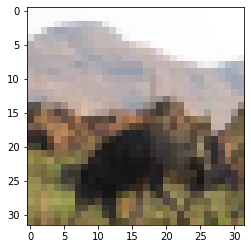

In [11]:
plt.imshow(sample_image_array / 255.0)

## Load a batch of images using ImageDataGenerator
* As in the previous step,
each image will be rescaled to the range [0, 1]

In [12]:
image_generator = ImageDataGenerator(horizontal_flip=True, rescale=1.0 / 255.0)

## Using image_generator, we'll pick and display a random batch of 10 images directly from the directory they are stored in

Found 270000 images belonging to 3 classes.


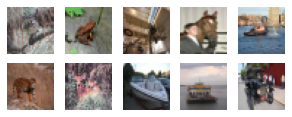

In [14]:
iterator = (image_generator.flow_from_directory(directory=data_directory,batch_size=10))
for batch, _ in iterator:
  plt.figure(figsize=(5, 5))
  for index, image in enumerate(batch, start=1):
    ax = plt.subplot(5, 5, index)
    plt.imshow(image)
    plt.axis('off')
  plt.show()
  break

## Loading images using the tf.data.Dataset API

In [15]:
import tensorflow as tf
print(data_pattern)
image_dataset = tf.data.Dataset.list_files(data_pattern)

/root/.keras/datasets/cinic10/*/*/*.png


In [16]:
image_dataset

<ShuffleDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>

In [17]:
image_dataset.take(1)

<TakeDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>

## Take a single path from the dataset and use it to read the corresponding image

In [25]:
for file_path in image_dataset.take(1):
  sample_path = file_path.numpy()
  print(sample_path)
sample_image = tf.io.read_file(sample_path)

b'/root/.keras/datasets/cinic10/train/ship/n03344393_6487.png'


* Even though the image is now in memory, we must convert it into a format a neural
network can work with. For this, we must decode it from its PNG format into a
NumPy array, as follows:

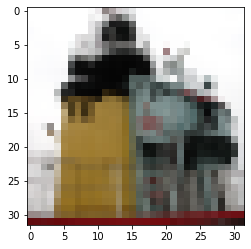

In [26]:
sample_image = tf.image.decode_png(sample_image,channels=3)
sample_image = sample_image.numpy()
plt.imshow(sample_image / 255.0)
plt.show()

* Take the first 10 elements of image_dataset, decode and normalize them, and
then display them using matplotlib

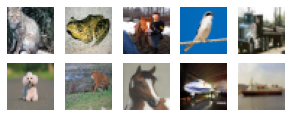

In [29]:
import numpy as np
plt.figure(figsize=(5, 5))
for index, image_path in enumerate(image_dataset.take(10), start=1):
  image = tf.io.read_file(image_path)
  image = tf.image.decode_png(image, channels=3)
  image = tf.image.convert_image_dtype(image,np.float32)
  ax = plt.subplot(5, 5, index)
  plt.imshow(image)
  plt.axis('off')
plt.show()
plt.close()

## Saving the model

In [1]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import ReLU
from tensorflow.keras.layers import Softmax
from tensorflow.keras.models import load_model
from tensorflow.keras.models import model_from_json

#### Define a function that will download and prepare the data by normalizing the train and test sets and one-hot encoding the labels:

In [2]:
def load_data():
  (X_train, y_train), (X_test, y_test) = mnist.load_data()
  # Normalize data.
  X_train = X_train.astype('float32') / 255.0
  X_test = X_test.astype('float32') / 255.0
  # Reshape grayscale to include channel dimension.
  X_train = np.expand_dims(X_train, axis=3)
  X_test = np.expand_dims(X_test, axis=3)
  # Process labels.
  label_binarizer = LabelBinarizer()
  y_train = label_binarizer.fit_transform(y_train)
  y_test = label_binarizer.fit_transform(y_test)
  return X_train, y_train, X_test, y_test

#### Define a function for building a network

In [3]:
def build_network():
  input_layer = Input(shape=(28, 28, 1))
  convolution_1 = Conv2D(kernel_size=(2, 2),padding='same',strides=(2, 2),filters=32)(input_layer)
  activation_1 = ReLU()(convolution_1)
  batch_normalization_1 = BatchNormalization()(activation_1)
  pooling_1 = MaxPooling2D(pool_size=(2, 2),strides=(1, 1),padding='same')(batch_normalization_1)
  dropout = Dropout(rate=0.5)(pooling_1)
  flatten = Flatten()(dropout)
  dense_1 = Dense(units=128)(flatten)
  activation_2 = ReLU()(dense_1)
  dense_2 = Dense(units=10)(activation_2)
  output = Softmax()(dense_2)
  network = Model(inputs=input_layer, outputs=output)
  return network

#### Implement a function that will evaluate a network using the test set

In [4]:
def evaluate(model, X_test, y_test):
  _, accuracy = model.evaluate(X_test, y_test,verbose=0)
  print(f'Accuracy: {accuracy}')

#### Prepare the data, create a validation split, and instantiate the neural network

In [5]:
X_train, y_train, X_test, y_test = load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [6]:
X_train.shape,X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [7]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=0.8)

In [8]:
X_train.shape,X_valid.shape

((48000, 28, 28, 1), (12000, 28, 28, 1))

In [9]:
model = build_network()

In [10]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 32)        160       
                                                                 
 re_lu (ReLU)                (None, 14, 14, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0     

#### Compile and train the model for 50 epochs, with a batch size of 1024

In [11]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [12]:
model.fit(X_train,y_train,
          validation_data=(X_valid,y_valid),
          epochs=50,
          batch_size=1024,
          verbose=0)

#### Save the model, along with its weights, in HDF5 format using the save() method

In [13]:
model.save('model_and_weights.hdf5')

#### Loading model and weights as HDF5

In [14]:
loaded_model = load_model('model_and_weights.hdf5')

#### Predicting using loaded model

In [15]:
evaluate(loaded_model, X_test, y_test)

Accuracy: 0.9835000038146973


## Visualizing a model's architecture

We have two different ways we can
display a model's architecture:

• Using a text summary

• Using a visual diagram

In [16]:
pip install pydot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Import Libraries

In [17]:
from PIL import Image
from tensorflow.keras import Model
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Softmax
from tensorflow.keras.utils import plot_model

In [18]:
input_layer = Input(shape=(64, 64, 3),name='input_layer')

## first convolution block

In [19]:
convolution_1 = Conv2D(kernel_size=(2, 2),
                        padding='same',
                        strides=(2, 2),
                        filters=32,
                        name='convolution_1')(input_layer)
activation_1 = LeakyReLU(name='activation_1')(convolution_1)
batch_normalization_1 = BatchNormalization(name='batch_normalization_1')(activation_1)
pooling_1 = MaxPooling2D(pool_size=(2, 2),
                         strides=(1, 1),
                         padding='same',
                         name='pooling_1')(batch_normalization_1)

## second convolution block

In [20]:
convolution_2 = Conv2D(kernel_size=(2, 2),
                        padding='same',
                        strides=(2, 2),
                        filters=64,
                        name='convolution_2')(pooling_1)
activation_2 = LeakyReLU(name='activation_2')(convolution_2)
batch_normalization_2 = BatchNormalization(name='batch_normalization_2')(activation_2)
pooling_2 = MaxPooling2D(pool_size=(2, 2),
                         strides=(1, 1),
                         padding='same',
                         name='pooling_2')(batch_normalization_2)
dropout = Dropout(rate=0.5, name='dropout')(pooling_2)

## Dense Layers

In [21]:
flatten = Flatten(name='flatten')(dropout)
dense_1 = Dense(units=256, name='dense_1')(flatten)
activation_3 = LeakyReLU(name='activation_3')(dense_1)
dense_2 = Dense(units=128, name='dense_2')(activation_3)
activation_4 = LeakyReLU(name='activation_4')(dense_2)
dense_3 = Dense(units=3, name='dense_3')(activation_4)
output = Softmax(name='output')(dense_3)

##Model

In [22]:
model = Model(inputs=input_layer, outputs=output,name='my_model')

## Model Summary

In [23]:
print(model.summary())

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 64, 64, 3)]       0         
                                                                 
 convolution_1 (Conv2D)      (None, 32, 32, 32)        416       
                                                                 
 activation_1 (LeakyReLU)    (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 pooling_1 (MaxPooling2D)    (None, 32, 32, 32)        0         
                                                                 
 convolution_2 (Conv2D)      (None, 16, 16, 64)        8256      
                                                          

## Plot a diagram of the network's architecture

In [24]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True,show_layer_names=True,to_file='my_model.jpg')
model_diagram = Image.open('my_model.jpg')

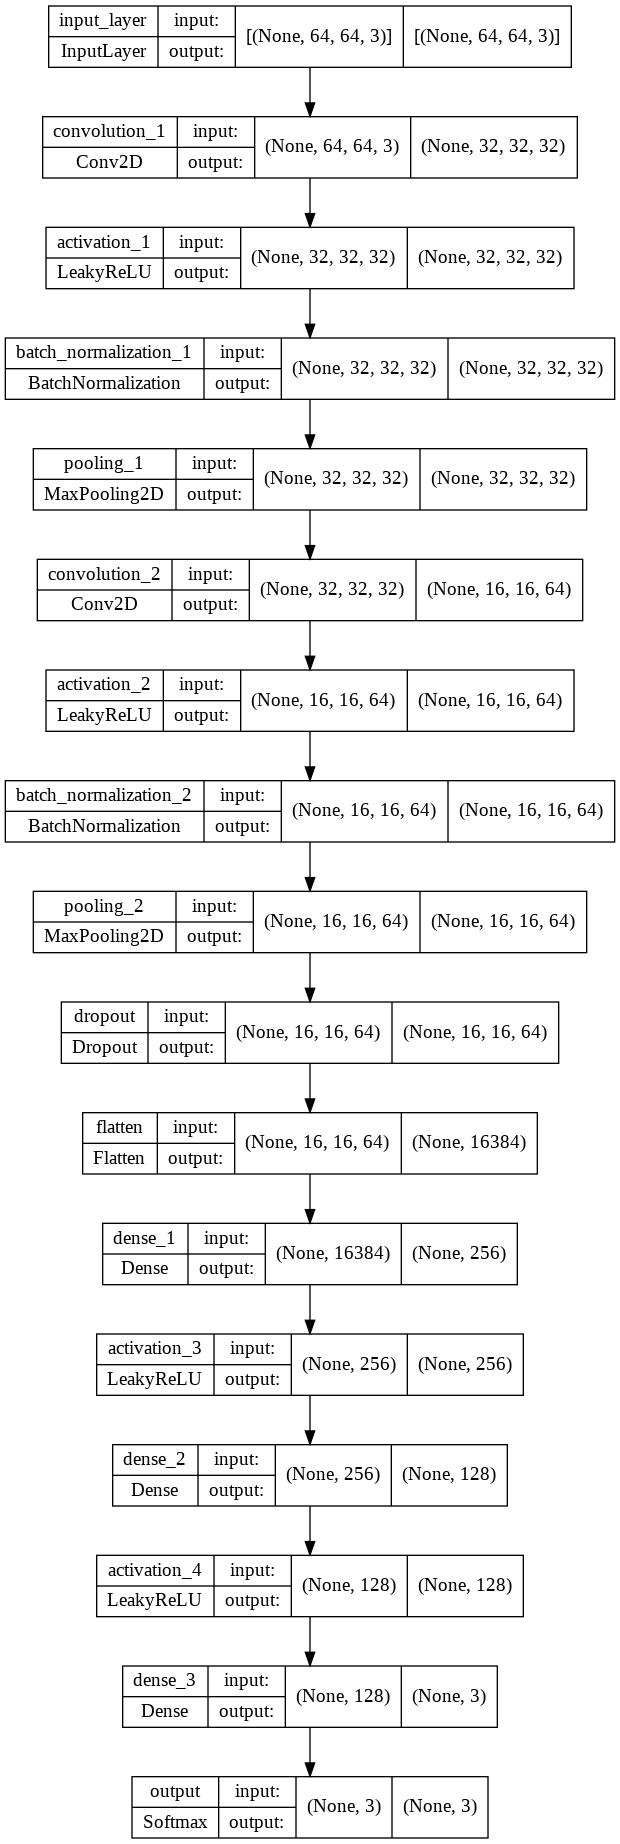

In [25]:
model_diagram

## Creating a basic image classifier

* Download Fashion-MNIST 
* Use the tf.data.Dataset API to load its images so that we
could feed them to our network, 
* Create the model using the declarative Functional
high-level Keras API.

#### Import the necessary packages

In [28]:
pip install -q git+https://github.com/tensorflow/docs

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras import Model
from tensorflow.keras.datasets import fashion_mnist as fm
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import ELU
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Softmax
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model

#### Define a function that will load and prepare the dataset

In [30]:
def load_dataset():
  (X_train, y_train), (X_test, y_test) = fm.load_data()
  X_train = X_train.astype('float32') / 255.0
  X_test = X_test.astype('float32') / 255.0
  # Reshape grayscale to include channel dimension.
  X_train = np.expand_dims(X_train, axis=3)
  X_test = np.expand_dims(X_test, axis=3)
  label_binarizer = LabelBinarizer()
  y_train = label_binarizer.fit_transform(y_train)
  y_test = label_binarizer.fit_transform(y_test)
  (X_train, X_val,y_train, y_val) = train_test_split(X_train, y_train,train_size=0.8)
  train_ds = (tf.data.Dataset.from_tensor_slices((X_train,y_train)))
  val_ds = (tf.data.Dataset.from_tensor_slices((X_val, y_val)))
  test_ds = (tf.data.Dataset.from_tensor_slices((X_test, y_test)))
  return train_ds,val_ds,test_ds

#### Implement a function that will build a network similar to **LeNet** with the addition of BatchNormalization

In [31]:
def build_network():
  input_layer = Input(shape=(28, 28, 1))
  x = Conv2D(filters=20,kernel_size=(5, 5),padding='same',strides=(1, 1))(input_layer)
  x = ELU()(x)
  x = BatchNormalization()(x)
  x = MaxPooling2D(pool_size=(2, 2),strides=(2, 2))(x)
  x = Dropout(0.5)(x)
  x = Conv2D(filters=50,kernel_size=(5, 5),padding='same',strides=(1, 1))(x)
  x = ELU()(x)
  x = BatchNormalization()(x)
  x = MaxPooling2D(pool_size=(2, 2),strides=(2, 2))(x)
  x = Dropout(0.5)(x)
  x = Flatten()(x)
  x = Dense(units=500)(x)
  x = ELU()(x)
  x = Dropout(0.5)(x)
  x = Dense(10)(x)
  output = Softmax()(x)
  model = Model(inputs=input_layer, outputs=output)
  return model

#### Define a function that takes a model's training history, along with a metric of interest, to create a plot corresponding to the training and validation of the curvesof such a metric:

In [37]:
def plot_model_history(model_history, metric, ylim=None):
  plt.style.use('seaborn-darkgrid')
  plotter = tfdocs.plots.HistoryPlotter()
  plotter.plot({'Model': model_history}, metric=metric)
  plt.title(f'{metric.upper()}')
  if ylim is None:
    plt.ylim([0, 1])
  else:
    plt.ylim(ylim)
    plt.savefig(f'{metric}.png')
  plt.show()
  plt.close()

#### Consume the training and validation datasets in batches of 256 images at a time.

* The prefetch() method spawns a background thread that populates a buffer of
size 1024 with image batches:

In [33]:
BATCH_SIZE = 256
BUFFER_SIZE = 1024
train_dataset, val_dataset, test_dataset = load_dataset()
train_dataset = (train_dataset.shuffle(buffer_size=BUFFER_SIZE).batch(BATCH_SIZE).prefetch(buffer_size=BUFFER_SIZE))
val_dataset = (val_dataset.batch(BATCH_SIZE).prefetch(buffer_size=BUFFER_SIZE))
test_dataset = test_dataset.batch(BATCH_SIZE)

4431872/4422102 [==============================] - 0s 0us/step


In [42]:
type(train_dataset)

tensorflow.python.data.ops.dataset_ops.PrefetchDataset

## Build and train the network

In [35]:
EPOCHS = 100
model = build_network()
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
model_history = model.fit(train_dataset, validation_data=val_dataset, epochs=EPOCHS, verbose=0)

## Plot the training and validation loss and accuracy

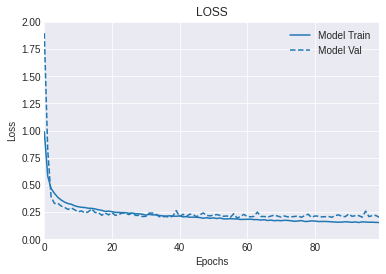

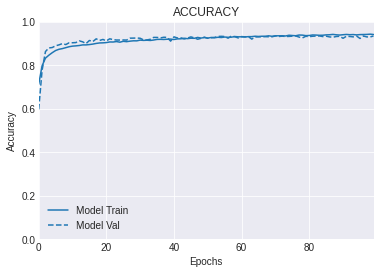

In [38]:
plot_model_history(model_history, 'loss', [0., 2.0])
plot_model_history(model_history, 'accuracy')

## Visualize the model's architecture

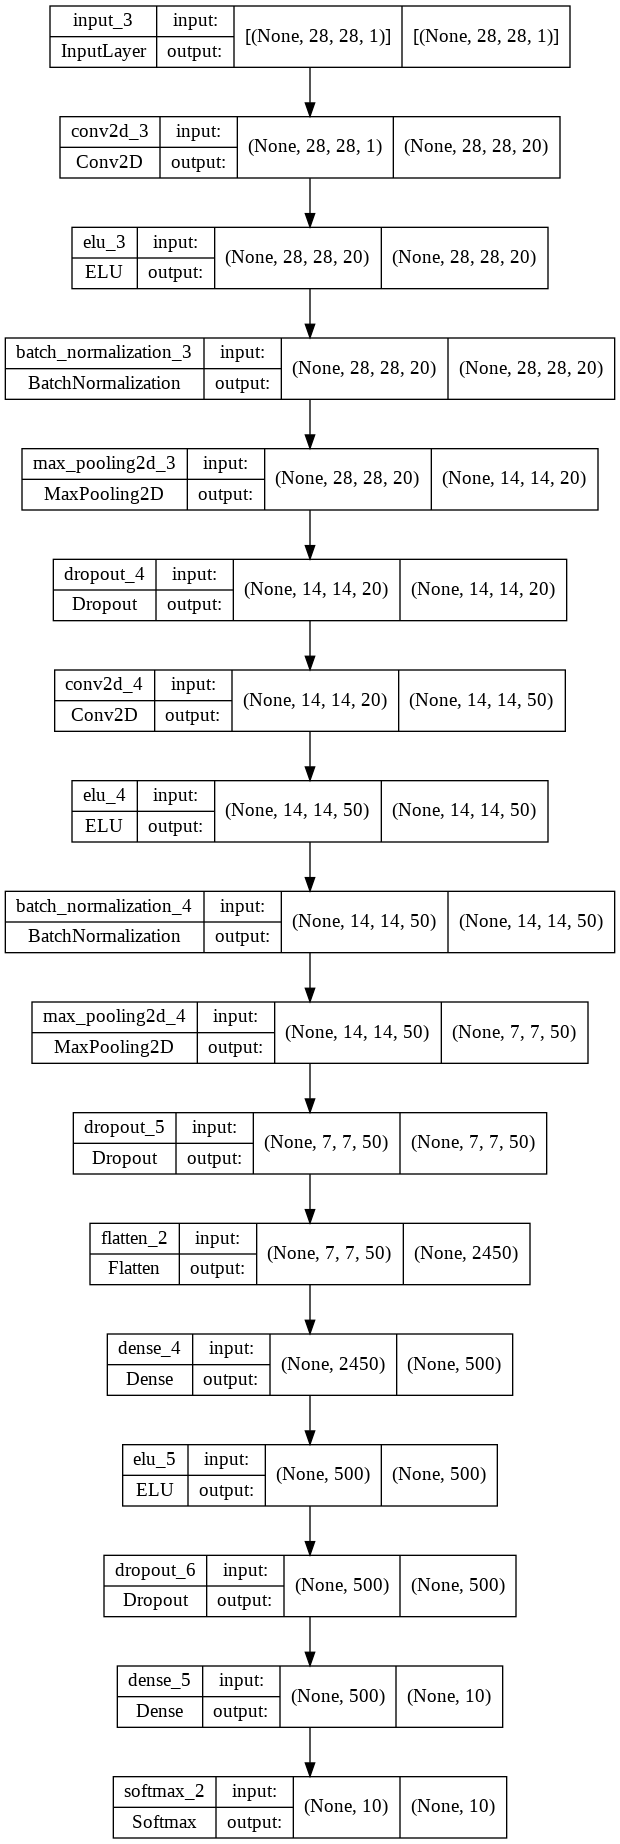

In [39]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')

##Save the model

In [40]:
model.save('model.hdf5')

## Load and evaluate the model

In [41]:
loaded_model = load_model('model.hdf5')
results = loaded_model.evaluate(test_dataset, verbose=0)
print(f'Loss: {results[0]}, Accuracy: {results[1]}')

Loss: 0.23947618901729584, Accuracy: 0.9261999726295471
